# 
Podstawowe predykaty geometryczne, przeprowadzanie testów, wizualizacja i opracowanie wyników

In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test1 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [220]:
def draw_points(points):
    vis = Visualizer()
    vis.add_point(points, s=5, color='green')
    vis.show()

In [221]:
def draw_line(points_left, points_mid, points_right,size,on_line_mul=1):
    vis = Visualizer()
    vis.add_line(((-1.0, 0.0), (1.0,0.1)), color='red')
    vis.add_point(points_left, s=size, color=['green'])
    vis.add_point(points_mid, s=size*on_line_mul, color=['purple'])
    vis.add_point(points_right, s=size, color=['orange'])
    
    vis.show()

In [222]:
def draw_example():
    vis = Visualizer()
    vis.add_line(((0, 2), (10, 7)))
    vis.add_point((4, 4), s=30, color='green')
    vis.add_point((6, 6), s=30, color='red')
    vis.add_point((7, 4), s=30, color='purple')
    vis.show()

### Wprowadzenie
Celem ćwiczenia jest określenie po której stronie prostej znajduje się punkt.

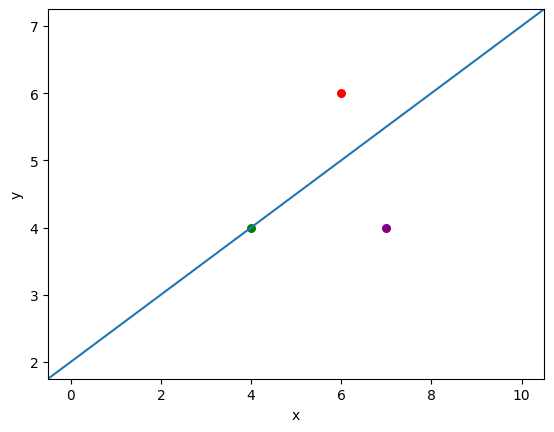

In [223]:
draw_example()

Do tego celu potrzebujesz wygenerować zbiory punktów testowych.


# Generowanie losowych punktów na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_points```
 (Aby generować losowo liczby rzeczywiste bardzo przydatna może okazać się jakaś funckja biblioteczna)

In [224]:
def generate_uniform_points(left, right, n = 10 ** 5):
    """
    Funkcja generuje równomiernie n punktów na kwadwratowym obszarze od left do right (jednakowo na osi y) o współrzędnych rzeczywistych
    :param left: lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """
    points = []
    for i in range(n):
        point = (np.random.uniform(left,right),np.random.uniform(left,right))
        points.append(point)
    return points

    raise Exception("Unimplemented")

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $x, y \in \left[-1000,1000\right]^{2}$.

In [225]:
points_a = generate_uniform_points(-1000, 1000, 10 ** 5)
#pierwsze osiem punktow
df_a = pd.DataFrame(data = points_a, columns = ['x','y'])
df_a.head(8)

,x,y
0,505.475328,245.260096
1,543.829210,-672.463850
2,841.546910,-375.586593
3,-538.013750,-575.361692
4,981.666094,30.961485
5,-743.567579,-948.319601
6,-852.634301,270.506078
7,-990.917295,660.566736


Zwizualizuj wygenerowane punkty

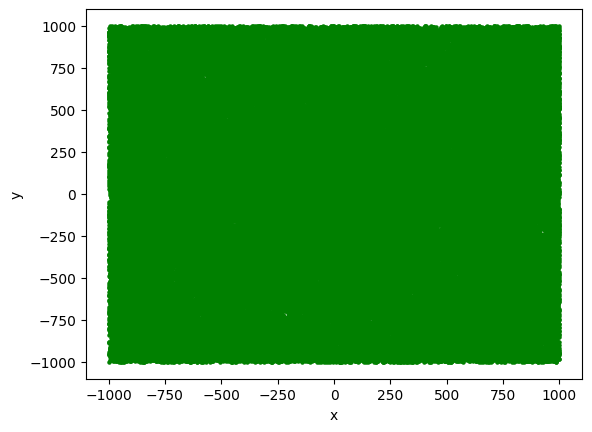

In [226]:
draw_points(points_a)

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $ x, y \in \left[-10^{14},10^{14}\right]^{2}$. Uzupełnij funkcję ```generate_big_num_of_points_2D```. Sprawdź, czy różni się wizualizalnie wynik tego ćwiczenia z poprzednim.

In [227]:
points_b = generate_uniform_points(-10 ** 14, 10 ** 14, 10 ** 5)
#pierwsze osiem punktow
df_b = pd.DataFrame(data = points_b, columns = ['x','y'])
df_b.head(8)

,x,y
0,1.324366e+13,-7.239817e+13
1,-7.086082e+13,1.937339e+13
2,-8.574089e+13,-4.347504e+13
3,2.817635e+12,1.402846e+13
4,6.758914e+13,5.094013e+13
5,-3.473874e+13,3.102321e+13
6,7.632418e+13,8.321587e+13
7,-7.406031e+13,-4.820196e+13


Zwizualizuj wygenerowane punkty.

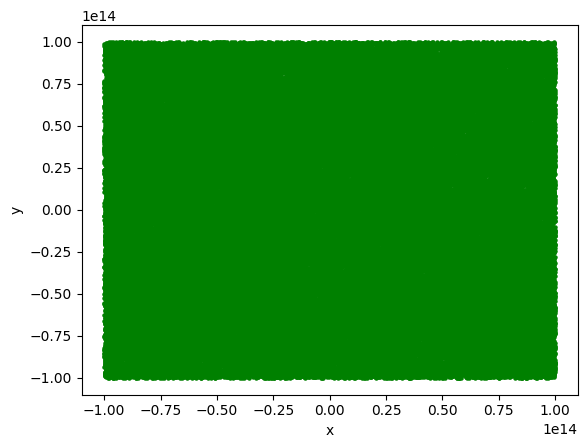

In [228]:
draw_points(points_b)

Uzupełnij funkcję ```generate_circle_points```

Zastanów się w sposób generować punkty jednostajnie na okręgu.

In [229]:
def generate_circle_points(O, R, n = 100):
    """
    Funkcja generuje jednostajnie n punktów na okręgu o środku O i promieniu R
    :param O: krotka współrzędnych x, y określająca środek okręgu
    :param R: promień okręgu 
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    points = []
    for i in range(n):
        t = np.random.uniform(1,360)
        x = R*np.cos(t*np.pi/180)
        y = R*np.sin(t*np.pi/180)
        points.append((x,y))
    return points
    raise Exception("Unimplemented")

<span style="color:red">Ćw.</span> Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. 

Uzupełnij funkcję ```generate_points_on_circle_2D```.

In [230]:
points_c = generate_circle_points((0, 0), 100,1000)
#pierwsze osiem punktow
df_c = pd.DataFrame(data = points_c, columns = ['x','y'])
df_c.head(8)

,x,y
0,32.594814,94.538765
1,28.344434,-95.898869
2,-19.368655,-98.106346
3,65.299114,-75.736555
4,85.926613,51.152881
5,87.700089,48.048874
6,-38.081975,92.464929
7,-85.905953,-51.187569


Zwizualizuj wygenerowane punkty.

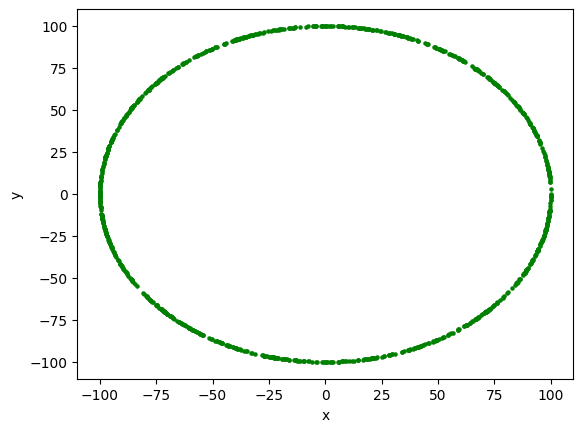

In [231]:
draw_points(points_c)

Uzupełnij funkcję ```generate_collinear_points```.

In [232]:
def generate_collinear_points(a, b, n=100):
    """
    Funkcja generuje równomiernie n współliniowych punktów leżących na prostej ab pomiędzy punktami a i b
    :param a: krotka współrzędnych oznaczająca początek wektora tworzącego prostą
    :param b: krotka współrzędnych oznaczająca koniec wektora tworzącego prostą
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    #y == ax+b
    #0 == -a + b i 0.1 == a + b
    #a == b i 0.1 == 2a
    #0.05 == b i 0.05 == a
    points = []
    for i in range(n):
        x = np.random.uniform(-1000,1000)
        y = 0.05*x + 0.05
        points.append((x,y))
    return points
    raise Exception("Unimplemented")

<span style="color:red">Ćw.</span>  Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D o współrzędnej z przedziału $ x \in \langle -1000,1000 \rangle$ leżących na prostej wyznaczonej przez wektor $ \overrightarrow{ab}$. Przyjmij punkty $ a = (-1.0, 0.0)$ oraz $ b = (1.0, 0.1)$. Uzupełnij funkcję ```generate_points_on_line_2D```.

In [233]:
points_d= generate_collinear_points((-1.0, 0.0), (1.0,0.1),1000)
#pierwsze osiem punktow 
df_d = pd.DataFrame(data = points_d, columns = ['x','y'])
df_d.head(8)

,x,y
0,-42.102891,-2.055145
1,-545.155736,-27.207787
2,677.221159,33.911058
3,428.929222,21.496461
4,821.976406,41.148820
5,-757.933707,-37.846685
6,-476.770616,-23.788531
7,328.107868,16.455393


Zwizualizuj wygenerowane punkty.

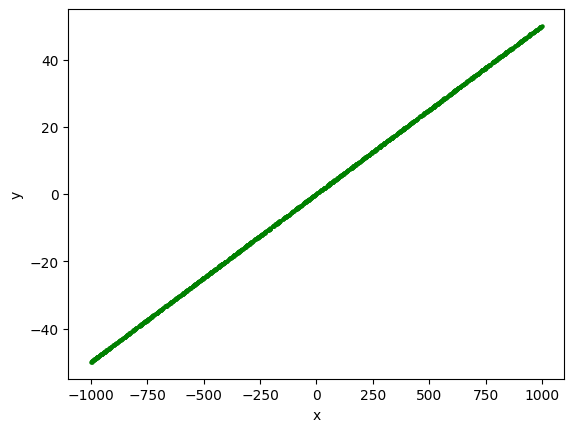

In [234]:
draw_points(points_d)

Przeprowadź test poprawności powyższych funkcji

In [235]:
Test().runtest(1, generate_uniform_points, generate_circle_points, generate_collinear_points)

Lab 1, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
Result: 4/4
Time: 0.730s


# Po której stornie prostej znajduje się punkt?

Prostym sposobem do obliczenia, po której strnie prostej znajduje się punkt jest obliczenie iloczynu wektorowego 
$\overrightarrow{ab} \times \overrightarrow{ac}$, gdzie $ c = (x,y)$ jest punktem, dla którego poszukujemy wiadomości o lokalizacji względem prostej przechodzącej przez punkty $ a$ i $ b$. Metoda ta jest równoznaczna z obliczeniem wyznacznika macierzy $ 2\times2$:  

$$
(1)\det(a, b, c)= \begin{vmatrix}
       a_{x} - c_{x} & a_{y} - c_{y} \\
       b_{x} - c_{x} & b_{y} - c_{y} 
              \end{vmatrix}
$$


lub wyznacznika macierzy $ 3\times3$:

$$
(2)\det(a, b, c)= \begin{vmatrix}
       a_{x} & a_{y} & 1 \\
       b_{x} & b_{y} & 1 \\
       c_{x} & c_{y} & 1
              \end{vmatrix}
$$

Upraszczając tą macierz przez odjęcie drugiego wiersza od trzeciego i odjęcie pierwszego wiersza od drugiego otrzymamy:

$$
\det(a, b, c)  = \begin{vmatrix}
              a_{x}         & a_{y}         & 1 \\
              b_{x} - a_{x} & b_{y} - a_{y} & 0 \\
              c_{x} - b_{x} & c_{y} - b_{y} & 0
                     \end{vmatrix}
              = (b_{x} - a_{x})(c_{y} - b_{y}) - (b_{y} - a_{y})(c_{x} - b_{x})
$$

Jest to wzór, z który opisuje pole równoległoboku mającego boki $ ab$ oraz $ ac$ (Dowód dlaczego tak jest, do zrobienia w domu)  
Dlaczego wiemy, że po obliczeniu wskaźnika podanego powyżej będziemy wiedzieć, po której stornie prostej znajduje się punkt?</font>
<font size="1">
</br>
***

**Dowód**:  

Załóżmy, że mamy dane trzy punkty w przestrzeni 2-wymiarowej $A, B$ oraz $C$. Znajdujemy prostą przechodzącą przez punkty $A$ i $B$. Następnie obliczamy $C_{y}$ przy danym $C_{x}$ i sprawdzamy czy punkt leży nad czy pod prostą.
Współczynnik nachylenia prostej jest nastepujący:

$$a = \frac{B_{y} - A_{y}}{B_{x} - A_{x}}
$$
Natomiast współczynnik $b$ wynosi:

$$b = B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}
$$

Po wpisaniu do równania $y = ax + b$ wyliczonego nachylenia prostej, współczynnika $b$ oraz zmiennej $C_{x}$ otrzymujemy:

$$y = \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x}+ \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right)
$$

Otzymujemy punkt $C$ po lewej stronie prostej jeżeli $C_{y} - y > 0$, po prawej jeżeli $C_{y} - y < 0$, a punkt $C$ leżący na prostej, jeżeli $C_{y} - y = 0$. Przekształcimy powyższe równanie dla $C_{y} - y > 0$:

$$C_{y} - y > 0$$ 
$$C_{y} - \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x} - \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right) > 0$$
$$C_{y}(B_{x} - A_{x}) - C_{x}(B_{y} - A_{y}) - B_{y}(B_{x} - A_{x}) + B_{x}(B_{y} - A_{y}) > 0$$
$$(C_{y} - B_{y})(B_{x} - A_{x}) + (B_{x} - C_{x})(B_{y} - A_{y}) > 0$$ 
$$(C_{y} - B_{y})(B_{x} - A_{x}) - (C_{x} - B_{x})(B_{y} - A_{y}) > 0$$

Zatem widzimy, że ostatnie równie jest takie same co przy równaniu wyznacznika macierzy $3\times3$. Niejawnie założyliśmy tutaj, że $B_{x}$ jest wieksze od $A_{x}$ , jeżeli byłoby odwrotnie zmieniłby się tylko znak nierówności na przeciwny. W naszym przypadku pokazaliśmy, że $C$ znajduje się po lewej stronie prostej jeżeli wyznacznik jest dodatni oraz po prawej stronie prostej, jeżeli wyznacznik jest ujemny. $Q.E.D$

---
Kolejnym zadaniem będzie zaimplementowanie własnych wyznaczników $(1)$ oraz $(2)$ i porówanie ich szybkości działania z wyznacznikami bibliotecznymi w testowaniu dla różnych zbiorów punktów. Co dodatkowo chcemy sprawdzić, czy wszystkie wyznaczniki podobnie kwalifikują podział względem danej lini.

Uzupełnij funkcje ```mat_det_3x3```

In [236]:
def mat_det_3x3(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    return (b[0]-a[0])*(c[1]-b[1]) - (b[1]-a[1])*(c[0]-b[0])
    raise Exception("Unimplemented")

Uzupełnij funkcję ```mat_det_3x3_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [237]:
def mat_det_3x3_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    m = np.array([[a[0],a[1],1],[b[0],b[1],1],[c[0],c[1],1]])
    return np.linalg.det(m)
    raise Exception("Unimplemented")

Uzupełnij funkcje ```mat_det_2x2```

In [238]:
def mat_det_2x2(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    return (a[0]-c[0])*(b[1]-c[1])-(b[0]-c[0])*(a[1]-c[1])
    raise Exception("Unimplemented")

Uzupełnij funkcję ```mat_det_2x2_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [239]:
def mat_det_2x2_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    m = np.array([[a[0]-c[0],a[1]-c[1]],[b[0]-c[0],b[1]-c[1]]])
    return np.linalg.det(m)
    raise Exception("Unimplemented")

Przetestujmy napisane powyżej funkcje.

In [240]:
Test().runtest(2, mat_det_3x3, mat_det_2x2, mat_det_3x3_lib, mat_det_2x2_lib)

Lab 1, task 2:
	Test 1: Passed
	Test 2: Passed
Result: 2/2
Time: 0.000s


<span style="color:red">Ćw.</span> Klasyfikacja punktów względem prostej - zaimplementuj funkcję ```categorize_points```, która skwalifukuje punkty względem prostej wyznacznonej przez wektor $\large \overrightarrow{ab}$ (prosta przechodząca przez punkty $\large a$ oraz $\large b$.

In [241]:
def categorize_points(points, a, b, mat_det_func, eps):
    """
    :param points: tablica punktów w postaci krotek współrzednych
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param mat_det_func: funkcja która będzie tutaj używana do obliczenia wyznacznika macierzy
    :param eps: epsilon - jak blisko wyznacznik macierzy ma być blisko zera, aby uznać punkt za leżący na prostej
    :return: 3 tablice zawierające kolejno zbiory punktów: leżące na lewo od prostej, leżące na prostej, leżące na prawo od prostek
    """
    left = []
    right = []
    middle = []
    for c in points:
        det = mat_det_func(a,b,c)
        if det > eps:
            left.append(c)
        elif det < -eps:
            right.append(c)
        else:
            middle.append(c)
    return left,middle,right
    raise Exception("Unimplemented")

In [242]:
def cat_points(points,a,b,eps):
    categorization = []
    for c in points:
        det1 = mat_det_3x3(a,b,c)
        det2 = mat_det_3x3_lib(a,b,c)
        det3 = mat_det_2x2(a,b,c)
        det4 = mat_det_2x2_lib(a,b,c)
        q = 'left' if det1 > eps else 'right' if det1 < -eps else 'middle'
        w = 'left' if det2 > eps else 'right' if det2 < -eps else 'middle'
        e = 'left' if det3 > eps else 'right' if det3 < -eps else 'middle'
        r = 'left' if det4 > eps else 'right' if det4 < -eps else 'middle'
        categorization.append((c[0],c[1],q,w,e,r))
    return categorization


In [243]:
a = (-1.0, 0.0)
b = (1.0, 0.1)

In [244]:
det_funcs = [mat_det_3x3,mat_det_3x3_lib,mat_det_2x2,mat_det_2x2_lib]
epsilons = [10**-20,10**-14,10**-10]

Zwizualizuj sklasyfikowane punkty. Punkty różnią się kolorami ze względu na klasyfikację: na lewo od prostej - zielone, na prostej - fioletowe, na prawo - pomarańczowe.

,funkcja,epsilon,z lewej,na prostej,z prawej
0,mat_det_3x3,1.000000e-20,50038,0,49962
1,mat_det_3x3,1.000000e-14,50038,0,49962
2,mat_det_3x3,1.000000e-10,50038,0,49962
3,mat_det_3x3_lib,1.000000e-20,50038,0,49962
4,mat_det_3x3_lib,1.000000e-14,50038,0,49962
5,mat_det_3x3_lib,1.000000e-10,50038,0,49962
6,mat_det_2x2,1.000000e-20,50038,0,49962
7,mat_det_2x2,1.000000e-14,50038,0,49962
8,mat_det_2x2,1.000000e-10,50038,0,49962
9,mat_det_2x2_lib,1.000000e-20,50038,0,49962


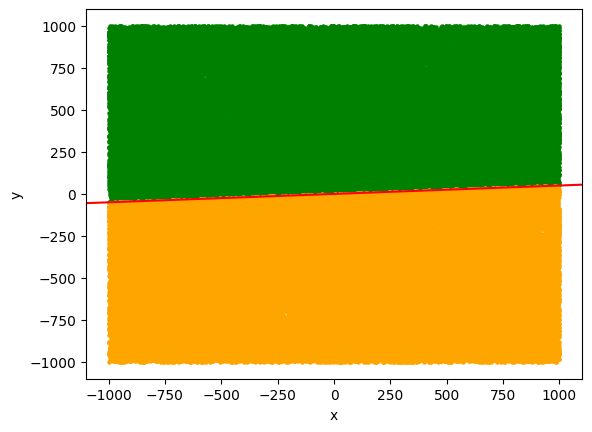

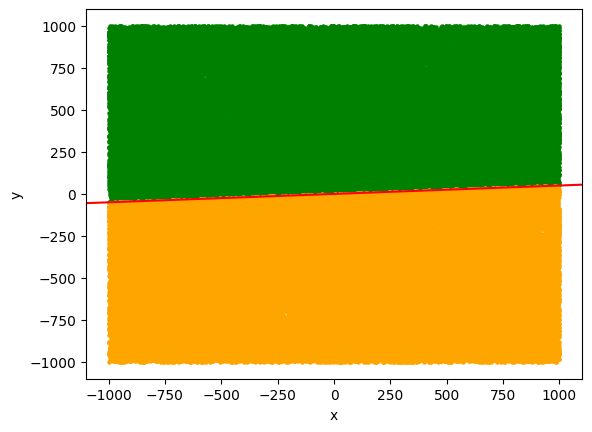

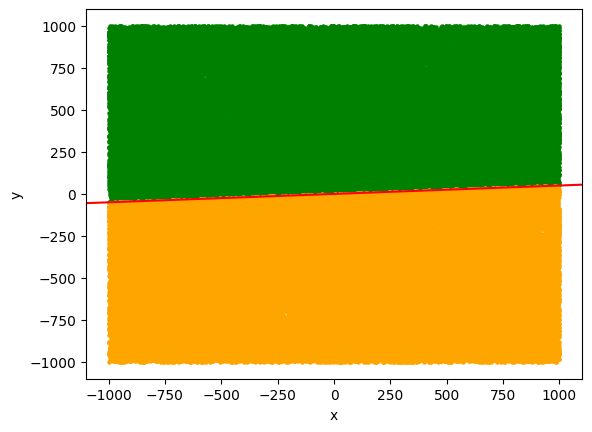

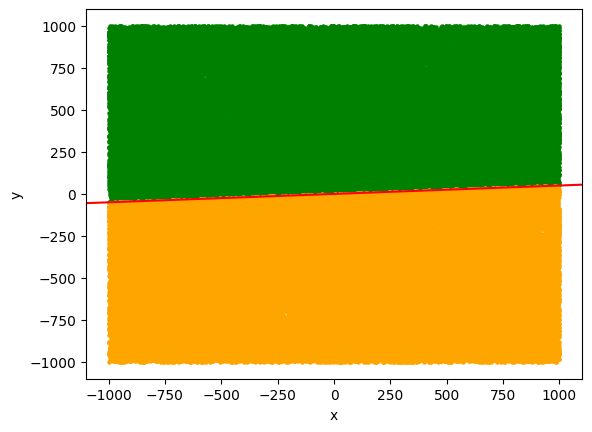

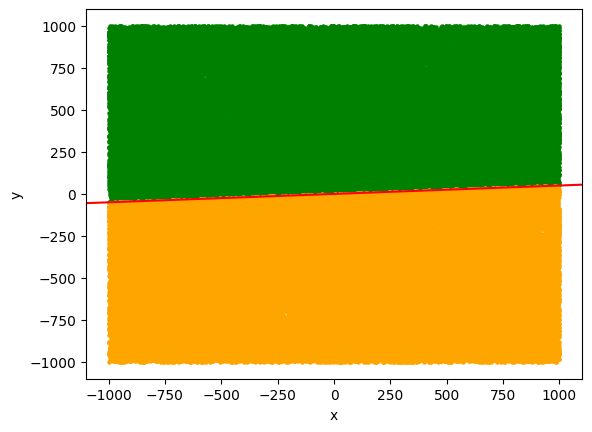

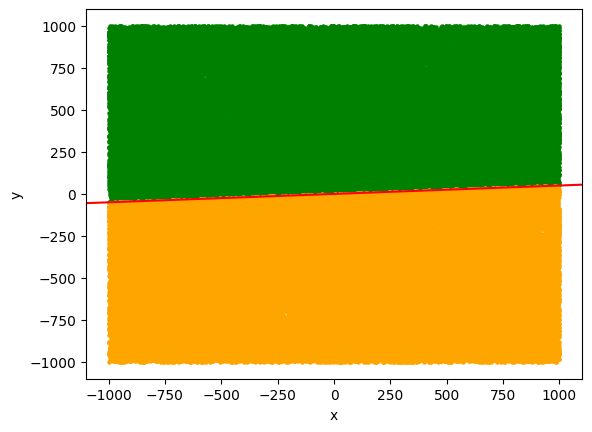

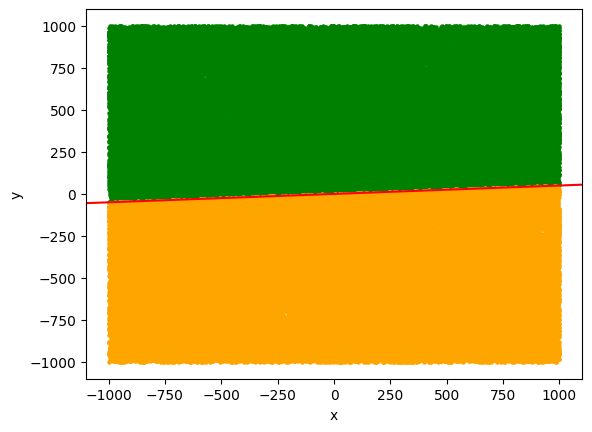

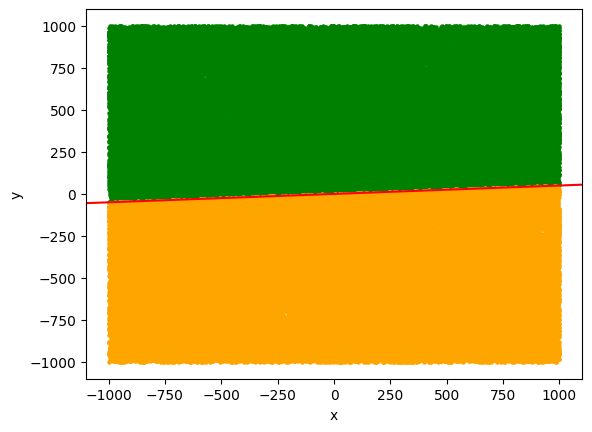

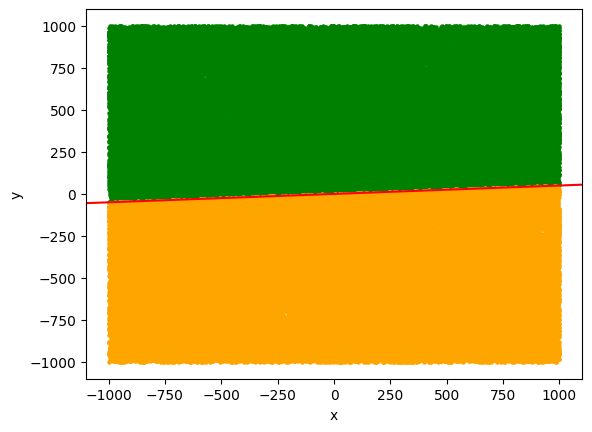

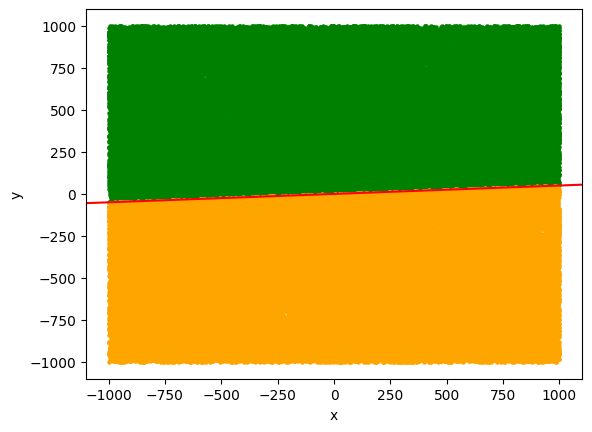

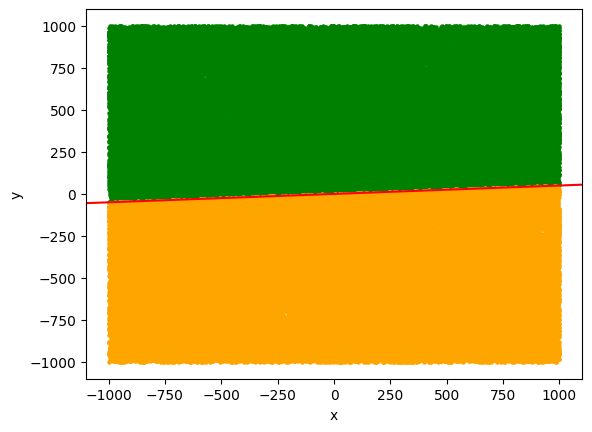

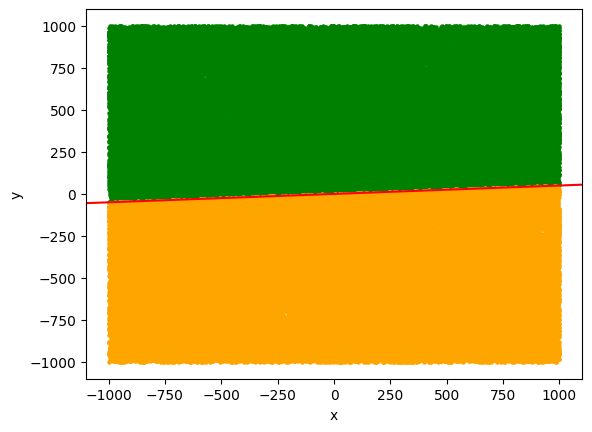

In [245]:

collected_data = []
for func in det_funcs:
    for epsilon in epsilons:
        classified_points_a_left,classified_points_a_mid,classified_points_a_right= categorize_points(points_a, a, b, func, epsilon)
        collected_data.append((str(func)[10:-19],epsilon,len(classified_points_a_left),len(classified_points_a_mid),len(classified_points_a_right)))
        draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right,5)
dt = pd.DataFrame(data=collected_data,columns=['funkcja','epsilon','z lewej','na prostej','z prawej'])
dt


,funkcja,epsilon,z lewej,na prostej,z prawej
0,mat_det_3x3,1.000000e-20,50087,0,49913
1,mat_det_3x3,1.000000e-14,50087,0,49913
2,mat_det_3x3,1.000000e-10,50087,0,49913
3,mat_det_3x3_lib,1.000000e-20,50087,0,49913
4,mat_det_3x3_lib,1.000000e-14,50087,0,49913
5,mat_det_3x3_lib,1.000000e-10,50087,0,49913
6,mat_det_2x2,1.000000e-20,50085,4,49911
7,mat_det_2x2,1.000000e-14,50085,4,49911
8,mat_det_2x2,1.000000e-10,50085,4,49911
9,mat_det_2x2_lib,1.000000e-20,50082,7,49911


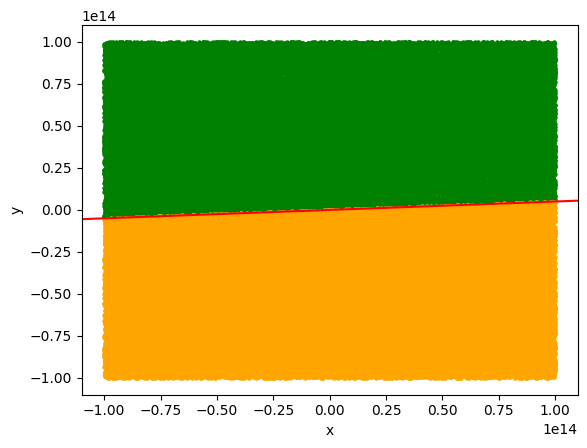

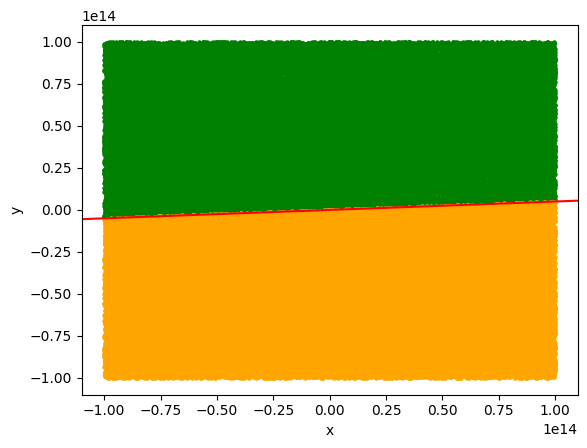

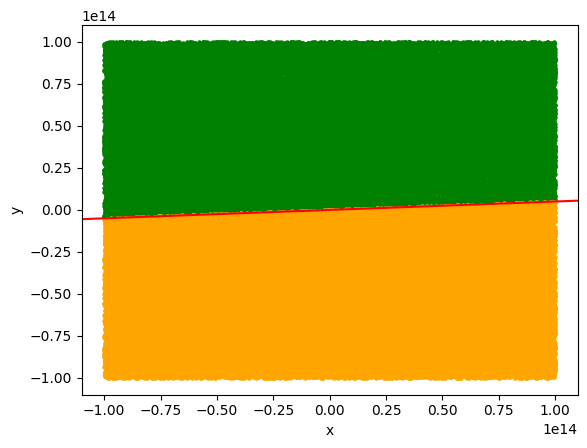

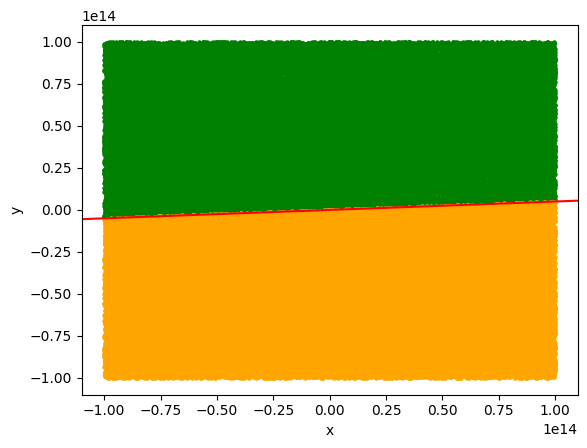

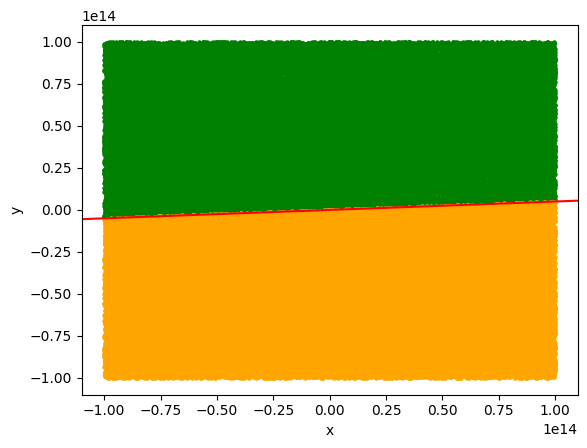

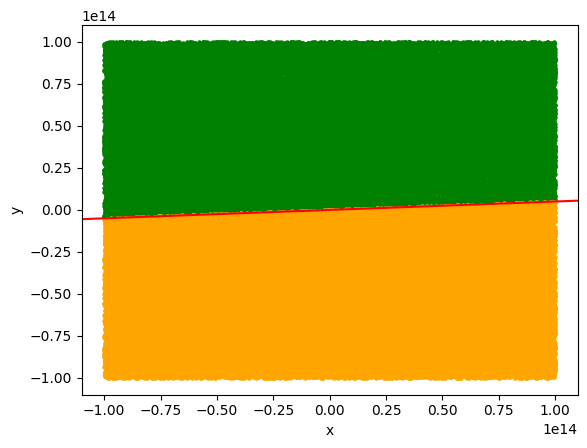

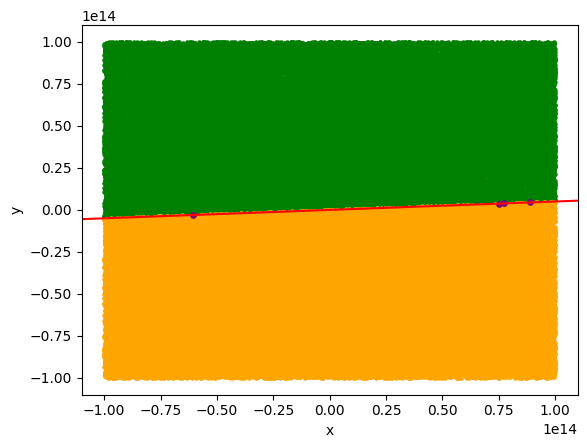

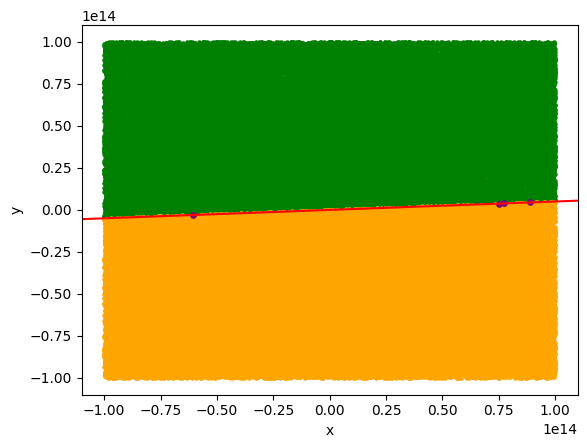

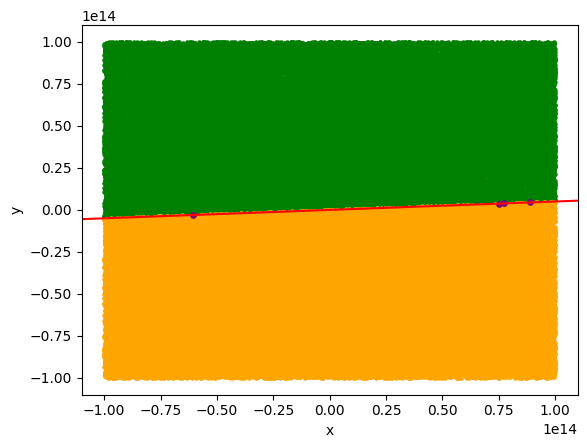

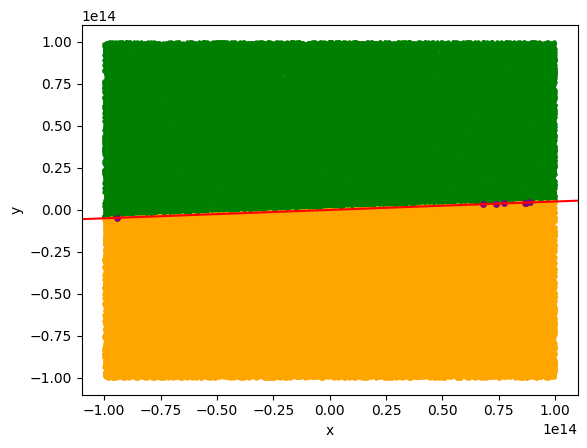

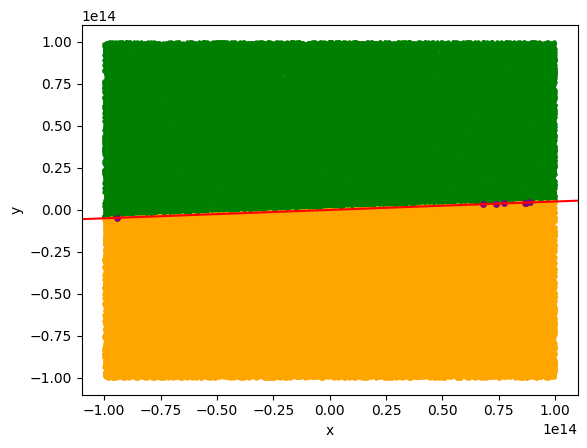

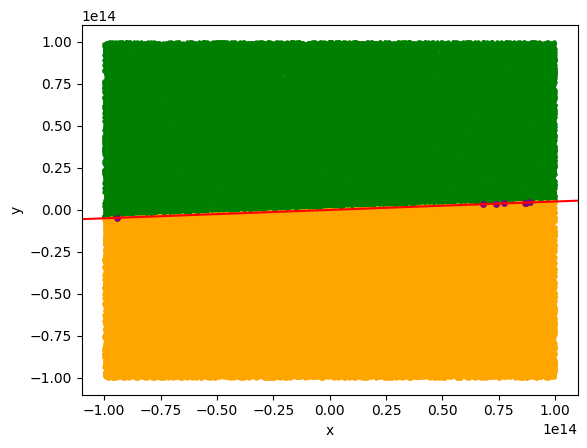

In [246]:

collected_data = []
for func in det_funcs:
    for epsilon in epsilons:
        classified_points_b_left,classified_points_b_mid,classified_points_b_right= categorize_points(points_b, a, b, func, epsilon)
        collected_data.append((str(func)[10:-19],epsilon,len(classified_points_b_left),len(classified_points_b_mid),len(classified_points_b_right)))
        draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right,5,3)
dt = pd.DataFrame(data=collected_data,columns=['funkcja','epsilon','z lewej','na prostej','z prawej'])
dt

,funkcja,epsilon,z lewej,na prostej,z prawej
0,mat_det_3x3,1.000000e-20,505,0,495
1,mat_det_3x3,1.000000e-14,505,0,495
2,mat_det_3x3,1.000000e-10,505,0,495
3,mat_det_3x3_lib,1.000000e-20,505,0,495
4,mat_det_3x3_lib,1.000000e-14,505,0,495
5,mat_det_3x3_lib,1.000000e-10,505,0,495
6,mat_det_2x2,1.000000e-20,505,0,495
7,mat_det_2x2,1.000000e-14,505,0,495
8,mat_det_2x2,1.000000e-10,505,0,495
9,mat_det_2x2_lib,1.000000e-20,505,0,495


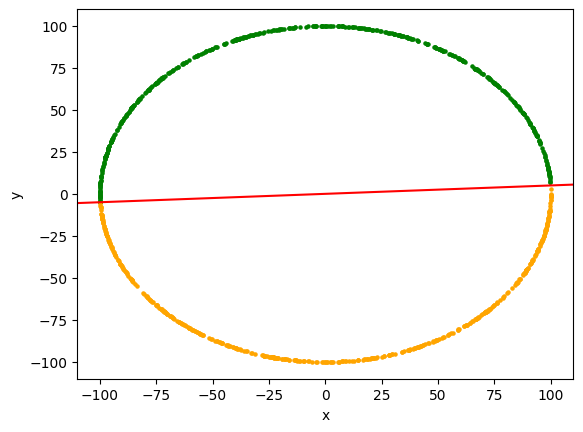

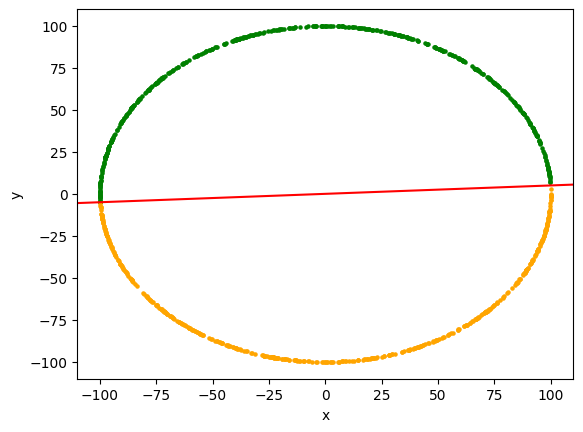

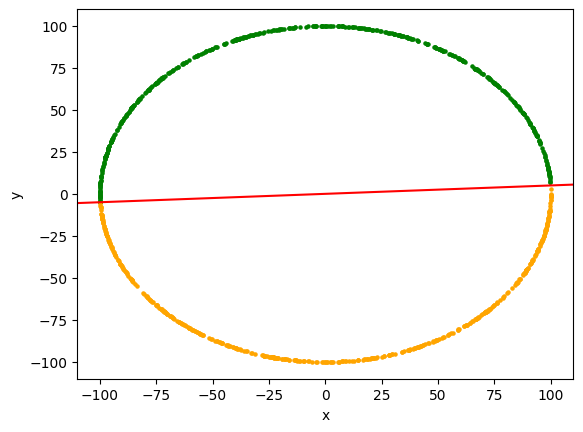

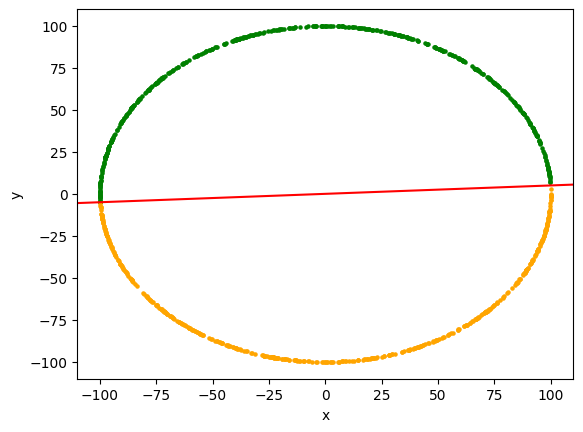

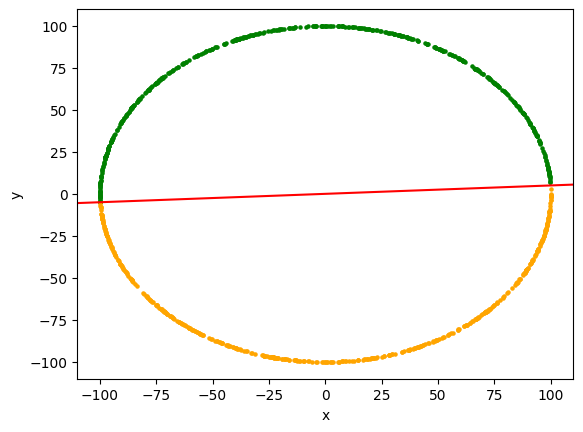

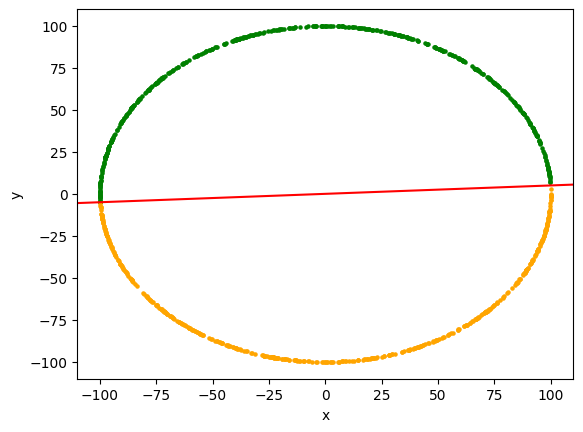

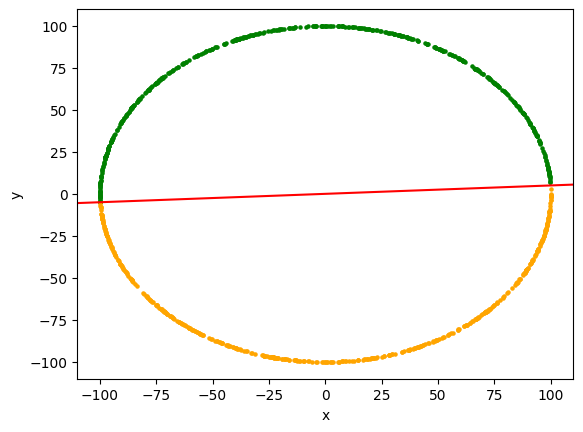

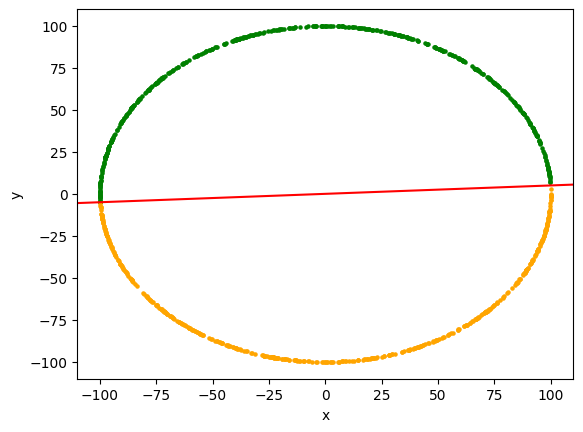

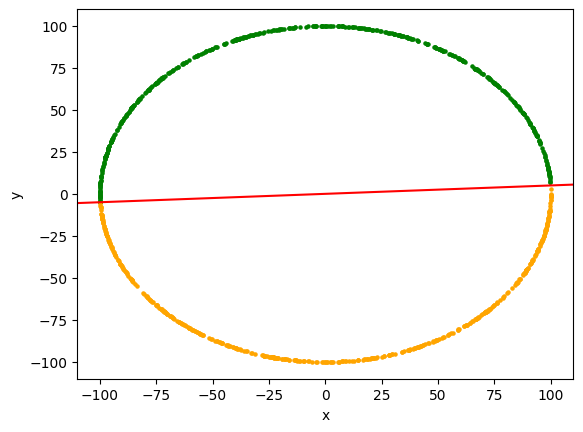

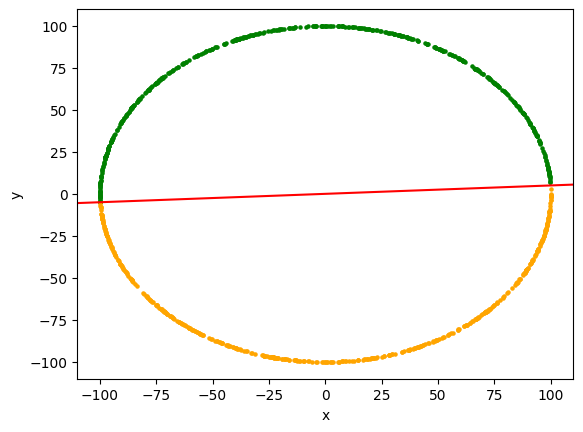

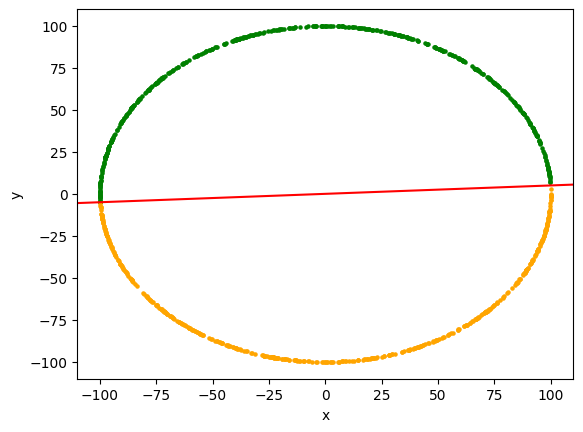

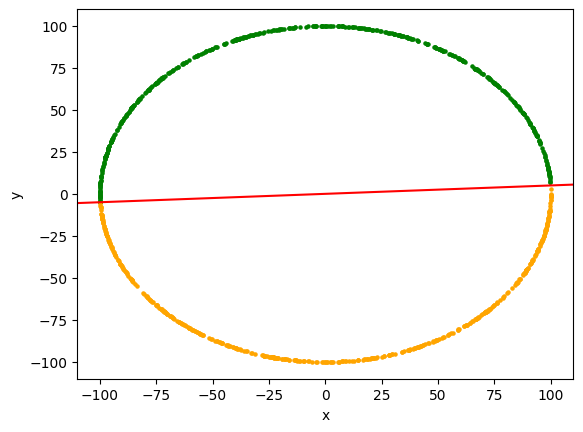

In [247]:

collected_data = []
for func in det_funcs:
    for epsilon in epsilons:
        classified_points_c_left,classified_points_c_mid,classified_points_c_right= categorize_points(points_c, a, b, func, epsilon)
        collected_data.append((str(func)[10:-19],epsilon,len(classified_points_c_left),len(classified_points_c_mid),len(classified_points_c_right)))
        draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right,5)
dt = pd.DataFrame(data=collected_data,columns=['funkcja','epsilon','z lewej','na prostej','z prawej'])
dt

,funkcja,epsilon,z lewej,na prostej,z prawej
0,mat_det_3x3,1.000000e-20,118,574,308
1,mat_det_3x3,1.000000e-14,0,796,204
2,mat_det_3x3,1.000000e-10,0,1000,0
3,mat_det_3x3_lib,1.000000e-20,376,291,333
4,mat_det_3x3_lib,1.000000e-14,17,883,100
5,mat_det_3x3_lib,1.000000e-10,0,1000,0
6,mat_det_2x2,1.000000e-20,154,701,145
7,mat_det_2x2,1.000000e-14,145,713,142
8,mat_det_2x2,1.000000e-10,0,1000,0
9,mat_det_2x2_lib,1.000000e-20,179,676,145


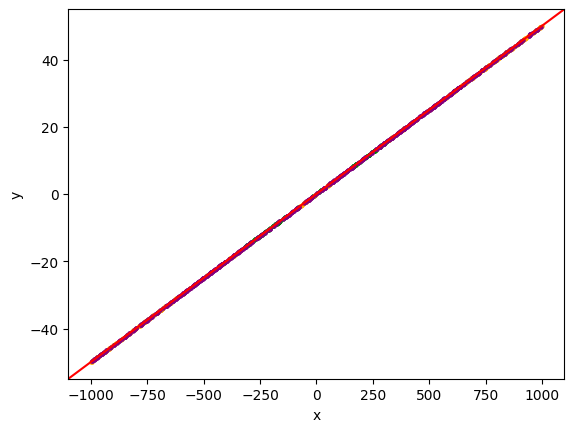

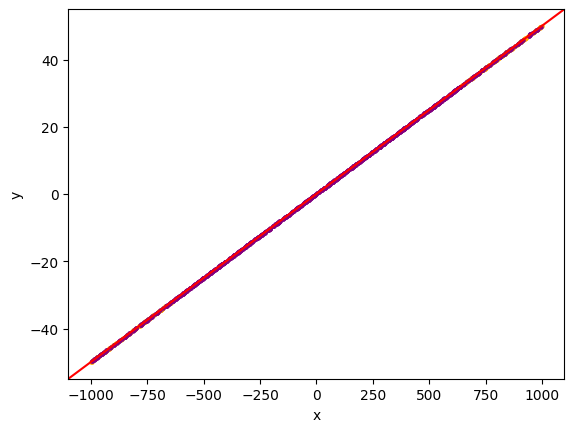

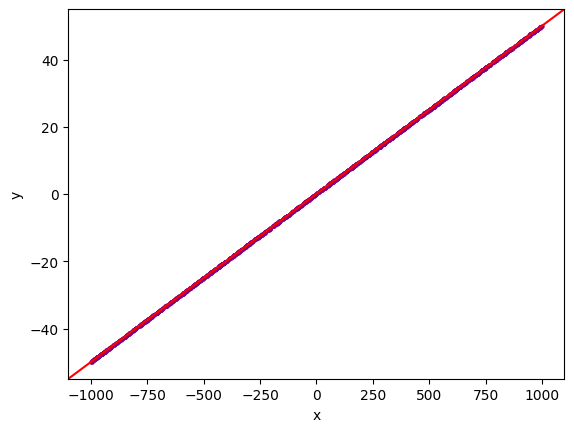

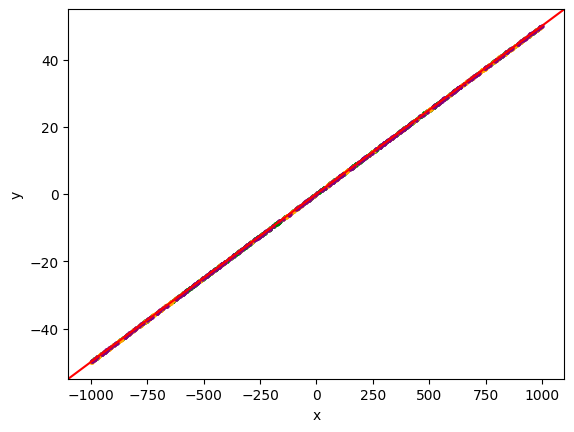

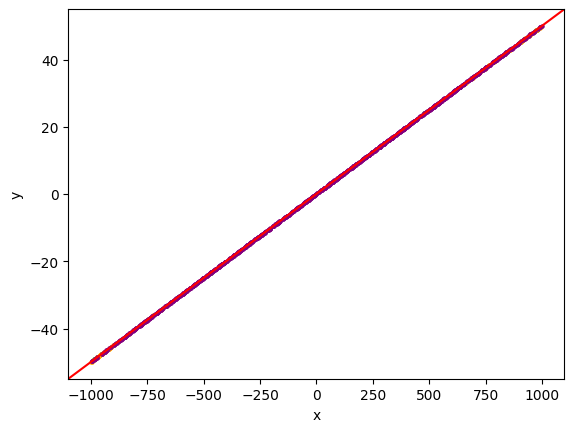

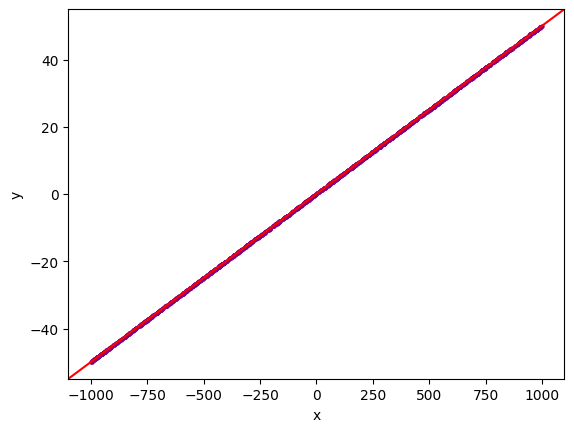

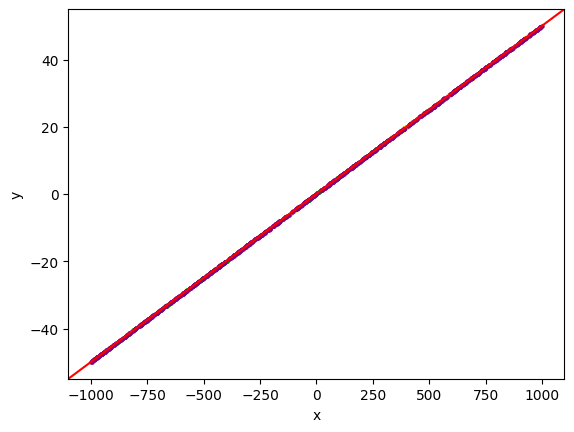

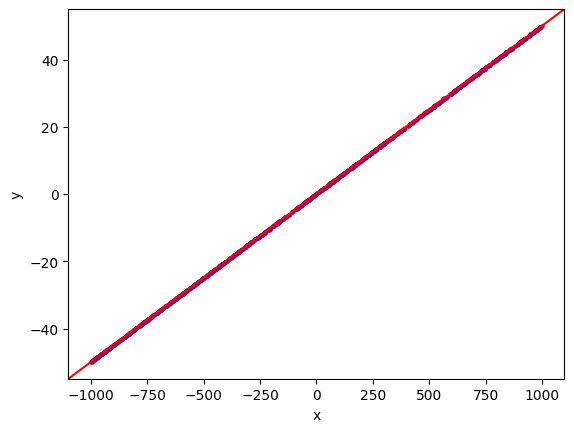

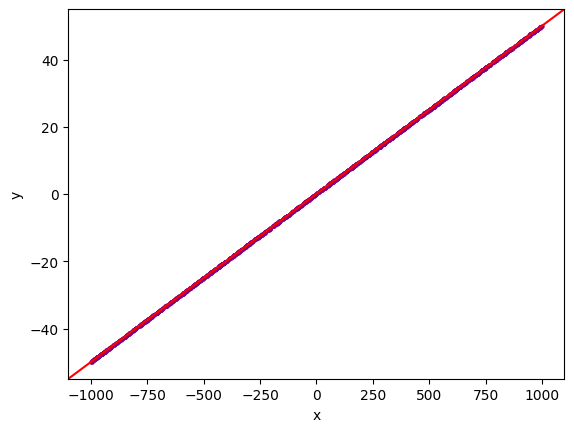

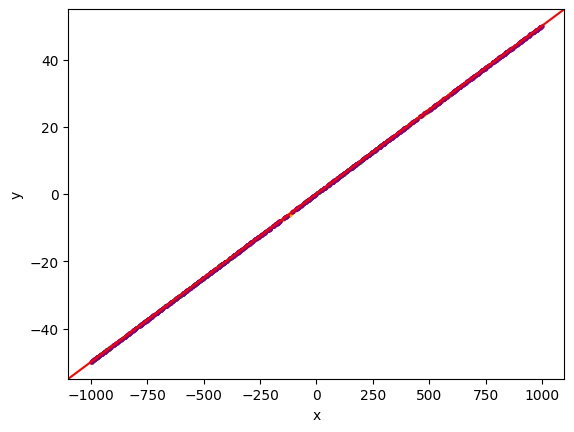

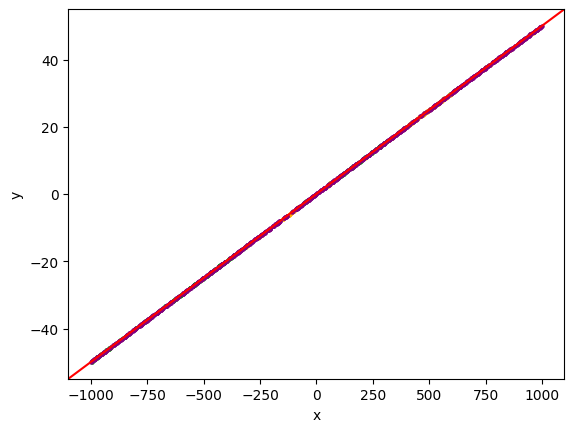

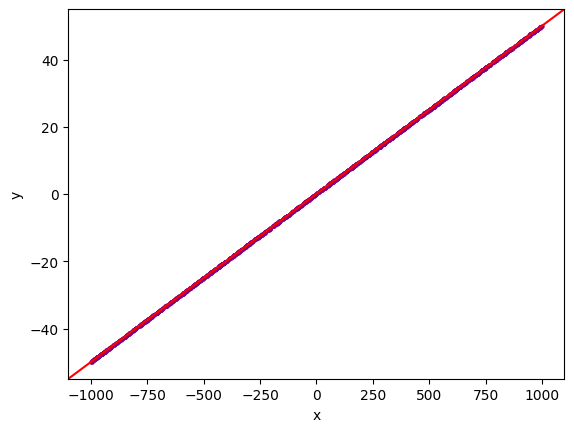

In [248]:

collected_data = []
for func in det_funcs:
    for epsilon in epsilons:
        classified_points_d_left,classified_points_d_mid,classified_points_d_right= categorize_points(points_d, a, b, func, epsilon)
        collected_data.append((str(func)[10:-19],epsilon,len(classified_points_d_left),len(classified_points_d_mid),len(classified_points_d_right)))
        draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right,5)
dt = pd.DataFrame(data=collected_data,columns=['funkcja','epsilon','z lewej','na prostej','z prawej'])
dt

Przeprowadźmy teraz testy dla mniejszej precyzji obliczeń. Do tego celu należy zmiejszyć typ danych z float64 (domyślny typ floata w pythonie) na float32. Różnią się one tym, że float32 jest zapisywane na mniejszej ilości bitów, co przekłada się no mniejszą ilosć cyfr po przecinku.
Zamienić typ floata w całej tablicy można zrobić w następujący sposób:

In [249]:
points_a_float32 = np.float32(points_a)
points_b_float32 = np.float32(points_b)
points_c_float32 = np.float32(points_c)
points_d_float32 = np.float32(points_d)

In [250]:
class_pointsd = cat_points(points_a_float32,a,b,10**-20)
df_points = pd.DataFrame(data=class_pointsd,columns=['x','y','eps 1e-14 d1','eps 1e-14 d2','eps 1e-14 d3','eps 1e-14 d4'])
df_points.head(5)

,x,y,eps 1e-14 d1,eps 1e-14 d2,eps 1e-14 d3,eps 1e-14 d4
0,505.475342,245.260101,left,left,left,left
1,543.829224,-672.463867,right,right,right,right
2,841.546936,-375.586578,right,right,right,right
3,-538.013733,-575.361694,right,right,right,right
4,981.666077,30.961485,right,right,right,right


In [251]:
class_pointsd = cat_points(points_b_float32,a,b,10**-20)
df_points = pd.DataFrame(data=class_pointsd,columns=['x','y','eps 1e-14 d1','eps 1e-14 d2','eps 1e-14 d3','eps 1e-14 d4'])
df_points.head(5)

,x,y,eps 1e-14 d1,eps 1e-14 d2,eps 1e-14 d3,eps 1e-14 d4
0,1.324366e+13,-7.239817e+13,right,right,right,right
1,-7.086082e+13,1.937339e+13,left,left,left,left
2,-8.574089e+13,-4.347503e+13,right,right,right,right
3,2.817635e+12,1.402846e+13,left,left,left,left
4,6.758914e+13,5.094013e+13,left,left,left,left


In [252]:
class_pointsd = cat_points(points_c_float32,a,b,10**-20)
df_points = pd.DataFrame(data=class_pointsd,columns=['x','y','eps 1e-14 d1','eps 1e-14 d2','eps 1e-14 d3','eps 1e-14 d4'])
df_points.head(5)

,x,y,eps 1e-14 d1,eps 1e-14 d2,eps 1e-14 d3,eps 1e-14 d4
0,32.594814,94.538765,left,left,left,left
1,28.344433,-95.898872,right,right,right,right
2,-19.368654,-98.106346,right,right,right,right
3,65.299110,-75.736557,right,right,right,right
4,85.926613,51.152882,left,left,left,left


In [253]:
class_pointsd = cat_points(points_d_float32,a,b,10**-20)
df_points = pd.DataFrame(data=class_pointsd,columns=['x','y','eps 1e-14 d1','eps 1e-14 d2','eps 1e-14 d3','eps 1e-14 d4'])
df_points.head(5)

,x,y,eps 1e-14 d1,eps 1e-14 d2,eps 1e-14 d3,eps 1e-14 d4
0,-42.102890,-2.055145,right,right,right,right
1,-545.155762,-27.207787,left,left,left,left
2,677.221130,33.911057,middle,middle,middle,middle
3,428.929230,21.496462,left,left,left,left
4,821.976379,41.148819,right,left,middle,middle


Porównaj wyniki klasyfikacji dla współrzędnych punktów o zmiejszonej precyzji floata

## Opisz swoje wnioski na podstawie przeprowadzonych własnoręcznie testów.
